# Introduction

* This is a kaggle competition to predict the meter usage of a building.
* Link for the kaggle competition: https://www.kaggle.com/competitions/ashrae-energy-prediction/data?select=sample_submission.csv

### More about the meter property

In the ASHRAE - Great Energy Predictor III Kaggle competition, there were four types of energy meter used to measure energy consumption in buildings:

1. **Electricity Meter**: This meter measures the amount of electricity consumed by a building. It is typically installed at the main electrical panel or switchboard and records the total amount of energy consumed by the building.

2. **Chilled Water Meter**: This meter measures the amount of chilled water used by a building's cooling system. Chilled water is used to cool the air in a building and is circulated through a system of pipes and coils.

3. **Steam Meter**: This meter measures the amount of steam used by a building's heating system. Steam is used to heat the air in a building and is circulated through a system of pipes and radiators.

4. **Hot Water Meter**: This meter measures the amount of hot water used by a building. Hot water is used for a variety of purposes in a building, including heating, washing, and cooking.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import the train data sets

In [2]:
# This is a method to reduce memory usage of imported data. The idea is based on: https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage/notebook

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
train = import_data("data/train.csv")
building_data = import_data("data/building_metadata.csv")
weather_train = import_data("data/weather_train.csv")

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 289.19 MB
Decreased by 53.1%
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.03 MB
Decreased by 60.3%
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 3.07 MB
Decreased by 68.1%


In [4]:
train.tail(500)

,building_id,meter,timestamp,meter_reading
20215600,1234,3,2016-12-31 23:00:00,0.000000
20215601,1235,0,2016-12-31 23:00:00,211.000000
20215602,1235,1,2016-12-31 23:00:00,2189.000000
20215603,1235,3,2016-12-31 23:00:00,2902.360107
20215604,1236,0,2016-12-31 23:00:00,72.000000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997


In [5]:
weather_train.head(500)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.093750,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.093750,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.593750,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.000000,-1.0,1020.0,250.0,2.599609
...,...,...,...,...,...,...,...,...,...
495,0,2016-01-21 15:00:00,15.000000,NaN,9.398438,0.0,1024.0,90.0,1.500000
496,0,2016-01-21 16:00:00,18.906250,NaN,9.398438,0.0,1024.0,140.0,2.099609
497,0,2016-01-21 17:00:00,20.000000,NaN,10.601562,0.0,1023.0,160.0,3.599609
498,0,2016-01-21 18:00:00,20.593750,6.0,11.101562,0.0,1022.0,140.0,3.599609


In [6]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [7]:
train.meter_reading.value_counts()

0.000000      1873976
20.000000       23363
2.930700        23181
36.599998       22154
8.792100        21787
               ...   
27.803101           1
58.975101           1
90.488403           1
370.938995          1
55.624100           1
Name: meter_reading, Length: 1688175, dtype: int64

In [8]:
print("How is it that we have", (1873976*100)/20216100, "% meter_reading as exactly 0? This must have due to technical faults in meter reading machines etc")

How is it that we have 9.269720668180312 % meter_reading as exactly 0? This must have due to technical faults in meter reading machines etc


In [9]:
# print("We can try filling that value with say median, i.e.", train.meter_reading[train.meter_reading!=0].median())
# meter_reading_median = train.meter_reading[train.meter_reading!=0].median()
# train.meter_reading[train.meter_reading==0]=meter_reading_median

In [10]:
print("Since the number of zeroes in the meter_reading is small (about 9%), we can drop them.")
zero_meter_readings = list(train[train['meter_reading'] == 0].index)
train.drop(zero_meter_readings, axis = 0, inplace = True)

Since the number of zeroes in the meter_reading is small (about 9%), we can drop them.


In [11]:
train.shape

(18342124, 4)

We have to merge building data to train data set based on the building_id and then again merge the resultant with the weather_train with respect to the site_id to get full information from the train data set.

# Merging train, building_id, weather_id

In [12]:
# Add the building details to training data
train = pd.merge(train, building_data, on="building_id", how="inner")

# Now add the weather data to the above transformed data
train = pd.merge(train, weather_train, on=["site_id", "timestamp"], how="left")

# As mentioned in the kaggle Description, meter_reading for meter-0 is in kBTU and we need to change it to kWh.
train.meter_reading[train.site_id==0]*=0.293

# We can now drop building_id and site_id since these numbering does not tell anything about the energy consumption.
train.drop(["building_id", "site_id"], inplace=True, axis=1)

In [13]:
train.head()

,meter,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,15.599233,Retail,9045,2016.0,NaN,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,15.719216,Retail,9045,2016.0,NaN,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,16.079197,Retail,9045,2016.0,NaN,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,15.719216,Retail,9045,2016.0,NaN,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,15.719216,Retail,9045,2016.0,NaN,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [14]:
train.isna().sum()

meter                        0
timestamp                    0
meter_reading                0
primary_use                  0
square_feet                  0
year_built            11033911
floor_count           15088792
air_temperature          89448
cloud_coverage         7975742
dew_temperature          92543
precip_depth_1_hr      3521887
sea_level_pressure     1187819
wind_direction         1326132
wind_speed              132577
dtype: int64

In [15]:
train.shape

(18342124, 14)

In [16]:
train.dropna().shape

(319835, 14)

In [17]:
print("So we only have ", 319835/20216100, "% non-empty data")

So we only have  0.01582080618912649 % non-empty data


which is very less thus we can get a biased result if we drop these values. But just to test which regressor model would work the best let us drop these nan values

In [18]:
train.dropna(inplace=True)
train.shape

(319835, 14)

In [19]:
train.head(5)

,meter,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
5149599,0,2016-01-01 01:00:00,8.50,Education,15326,1954.0,2.0,9.398438,0.0,-2.199219,0.0,1021.5,360.0,3.099609
5149600,0,2016-01-01 02:00:00,7.25,Education,15326,1954.0,2.0,8.296875,0.0,-2.800781,0.0,1021.5,0.0,0.000000
5149601,0,2016-01-01 03:00:00,7.50,Education,15326,1954.0,2.0,7.800781,0.0,-2.800781,0.0,1021.5,90.0,1.500000
5149602,0,2016-01-01 04:00:00,8.00,Education,15326,1954.0,2.0,5.000000,0.0,-0.600098,0.0,1022.0,0.0,0.000000
5149603,0,2016-01-01 05:00:00,7.00,Education,15326,1954.0,2.0,5.601562,0.0,-1.099609,0.0,1021.5,130.0,3.099609


In [20]:
train.describe()

,meter,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,319835.0,319835.000000,319835.000000,319835.0,319835.0,319835.000000,319835.0,319835.000000,319835.00000,319835.0,319835.0,319835.000000
mean,0.0,180.633698,96154.115638,NaN,NaN,NaN,NaN,NaN,-0.00000,NaN,NaN,NaN
std,0.0,286.884369,85350.454992,NaN,0.0,0.000000,0.0,0.000000,0.16272,NaN,NaN,0.000000
min,0.0,0.062500,387.000000,1903.0,1.0,1.099609,0.0,-9.398438,-1.00000,1008.0,0.0,0.000000
25%,0.0,18.250000,29063.000000,1924.0,4.0,12.796875,0.0,7.800781,0.00000,1013.5,120.0,2.099609
50%,0.0,69.770699,71994.000000,1955.0,5.0,15.601562,2.0,10.601562,0.00000,1016.5,270.0,3.599609
75%,0.0,196.240005,137806.000000,1971.0,7.0,18.906250,2.0,12.203125,0.00000,1020.0,300.0,5.699219
max,0.0,2293.879883,420885.000000,2016.0,14.0,35.000000,9.0,17.796875,8.00000,1032.0,360.0,12.898438


In [21]:
train.dtypes

meter                    int8
timestamp              object
meter_reading         float32
primary_use            object
square_feet             int32
year_built            float16
floor_count           float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtype: object

# Feature Engineering

We have some work to do before the 'train' data is ready to be fed to a machine learning algorithm:
1. **Playing with date and time features:** Adding date and time feature such as day of the week, hour of the day etc
2. **Handling categorical feature, primary_use**: Turn categorical features such as "primary_use" to numbers such as 1, 2 etc

## 1. Playing with date and time features

In [22]:
# Adding some date-time features
train.timestamp = pd.to_datetime(train.timestamp, format='%Y-%m-%d %H:%M:%S')
train["Month"] = train.timestamp.dt.month
train["Week"] = train.timestamp.dt.week
train["hour"] = train.timestamp.dt.hour

# Now let us remove the timestamp column
train.drop("timestamp", inplace=True, axis=1)

Adding date and time feature this way is somewhat discrepant from the point of view of an algorithm. Take for example week feature. 53rd week of a year is (algorithmically) largely distant from 1st week of the next year (since 53 >> 1) whereas in reality 53rd week is as distant to 1st week as is 2nd week to the 1st week. This discrepancy can be solve if we think of dates as some sinusoidal function with a year as periodicity.

### Now let us add some features based on date and time

If we look carefully, people use more energy in day time as compared to night time. Also, energy consumption changes based on the current weather. Thus, we can also these two features: **isDaytime** and **season**.

In [23]:
# Adding isDaytime feature
# 7<=hour<=18 represents dayTime
train["isDaytime"]=0
train["isDaytime"][train.hour<=18]=1
train["isDaytime"][train.hour<7]=0

| Seasons    | Months | Ordinal Number |
| ---------- | ------ | -------------- |
| Spring | 3,4,5 | 2 |
| Summer | 6,7,8 | 3 |
| Fall | 9,10,11 | 0 |
| Winter | 12,1,2 | 1 |

In [24]:
train['season']=1
train['season'][train.Month<=11]=0
train['season'][train.Month<=8]=3
train['season'][train.Month<=5]=2
train['season'][train.Month<=2]=1

### Making date and time features sinusoidal

#### Here is the graph (for Week) which shows how the date and time feature is being converted to its sinusodal form

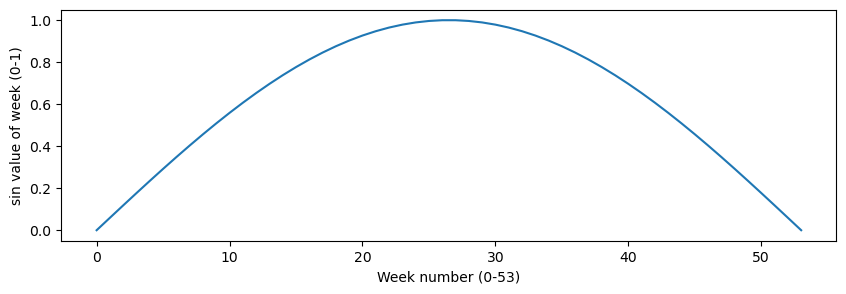

In [25]:
week = np.arange(54)
week_sin = np.sin(week* np.pi * (1/53))
plt.figure(figsize=(10,3))
plt.xlabel("Week number (0-53)")
plt.ylabel("sin value of week (0-1)")
plt.plot(week, week_sin);

In [26]:
train.insert(len(train.columns), "Month_sin", np.sin(train.Month * np.pi * (1/12)), False)
train.insert(len(train.columns), "Week_sin", np.sin(train.Week * np.pi * (1/53)), False)
train.insert(len(train.columns), "hour_sin", np.sin(train.hour * np.pi * (1/24)), False)
train.insert(len(train.columns), "wind_direction_sin", np.sin(train.wind_direction * np.pi * (1/360)), False)

# Now remove the existing date and time feature
train.drop(["Month", "Week", "hour", "wind_direction"], axis=1, inplace=True);

In [27]:
# What about the 'year_build' column?
train.year_built.unique()

array([1954., 1957., 1964., 1980., 1914., 1905., 1963., 2014., 1958.,
       2004., 1910., 1960., 1930., 1920., 1950., 1967., 1949., 1917.,
       1942., 1911., 1952., 2012., 1971., 1923., 1994., 1903., 1933.,
       1924., 1999., 1927., 1907., 1966., 1990., 1959., 1948., 2011.,
       1961., 1931., 1941., 1978., 1970., 1953., 1906., 1989., 1909.,
       1929., 2006., 2009., 1996., 1993., 2007., 1912., 2015., 1995.,
       1974., 2016., 1955., 1932.], dtype=float16)

Definitely, year_built cannot be one-hot encoded. This is an ordinal feature. We can group consecutive five years into one. e.g. 1900-1905 can grouped as 0, 1906-1910 as 1 and so on.

In [28]:
train.year_built = ((train.year_built-1900)/5).astype(int)

We are now done with date time feature engineering

## 2. Handling categorical feature, primary_use

In [29]:
train.primary_use.unique(), len(train.primary_use.unique())

(array(['Education', 'Technology/science', 'Lodging/residential',
        'Public services', 'Entertainment/public assembly', 'Utility',
        'Parking'], dtype=object),
 7)

In [30]:
train.primary_use.value_counts()

Education                        237341
Entertainment/public assembly     27139
Public services                   21701
Lodging/residential               13085
Parking                            9111
Technology/science                 7643
Utility                            3815
Name: primary_use, dtype: int64

Let us analyze how each of them affects the meter_reading

In [31]:
print("Printing mean value of each of primary_use\n")
primary_use_dict = {}
for i in train.primary_use.unique():
    primary_use_dict.update({i:  train.meter_reading[train.primary_use==i].mean()})
primary_use_dict = sorted(primary_use_dict.items(), key= lambda ele: ele[1]) #sorting the array based on the value of dict
primary_use_dict

Printing mean value of each of primary_use



[('Parking', 32.191505),
 ('Utility', 51.884808),
 ('Technology/science', 67.97891),
 ('Lodging/residential', 70.10455),
 ('Public services', 113.05324),
 ('Entertainment/public assembly', 139.52739),
 ('Education', 209.00246)]

Thus, primary_use also seems to be an ordinal feature based on how much each of the category consumes electricity. We can rank them based on their mean value. e.g. "Parking" gets the rank 1, "Utility" gets rank 2 and so on.

In [32]:
primary_use_rank = np.zeros(train.shape[0])
for i in range(len(primary_use_dict)):
    primary_use_rank[train.primary_use==primary_use_dict[i][0]]=i
# Now insert this array to train date set
train.insert(4, "primary_use_rank", primary_use_rank)

# we can now delete the primary_use row
train.drop("primary_use", inplace=True, axis=1)

In [33]:
train.isna().sum().sum()

0

In [34]:
# Let us now check the dependencies of the data of our matrix
train.corr().style.background_gradient(cmap='coolwarm')

,meter,meter_reading,square_feet,primary_use_rank,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,isDaytime,season,Month_sin,Week_sin,hour_sin,wind_direction_sin
meter,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
meter_reading,nan,1.000000,0.611807,0.173413,0.379377,0.625112,-0.014919,-0.011869,0.001970,0.001205,0.007319,-0.035097,0.062922,-0.006773,0.006307,0.002530,0.060924,-0.009773
square_feet,nan,0.611807,1.000000,-0.045200,0.267248,0.639419,-0.005688,0.004039,-0.007280,0.000296,0.007593,-0.001402,0.000550,0.005697,0.000933,-0.006065,0.000751,0.000370
primary_use_rank,nan,0.173413,-0.045200,1.000000,-0.204988,0.259416,0.005842,0.004431,0.005699,0.000220,-0.005975,0.007043,-0.002194,0.026850,0.021829,0.015514,-0.002309,0.003102
year_built,nan,0.379377,0.267248,-0.204988,1.000000,0.290656,0.006729,-0.003701,0.007745,-0.000521,-0.009198,0.005741,-0.004815,-0.005288,-0.002527,0.006520,-0.005099,0.001373
floor_count,nan,0.625112,0.639419,0.259416,0.290656,1.000000,-0.000222,0.006694,-0.001654,0.000535,0.002242,0.004791,-0.002562,0.020934,0.014515,0.005067,-0.002421,0.003154
air_temperature,nan,-0.014919,-0.005688,0.005842,0.006729,-0.000222,1.000000,0.079836,0.656386,-0.002837,-0.490413,0.471025,-0.492610,0.235404,0.589241,0.648644,-0.580442,0.290537
cloud_coverage,nan,-0.011869,0.004039,0.004431,-0.003701,0.006694,0.079836,1.000000,0.103010,0.015516,0.018543,0.210499,-0.170287,0.081039,0.057831,0.018026,-0.196092,0.152005
dew_temperature,nan,0.001970,-0.007280,0.005699,0.007745,-0.001654,0.656386,0.103010,1.000000,0.002070,-0.511487,0.198994,-0.170012,0.212704,0.623425,0.709932,-0.185086,0.119739
precip_depth_1_hr,nan,0.001205,0.000296,0.000220,-0.000521,0.000535,-0.002837,0.015516,0.002070,1.000000,-0.024828,0.033118,0.002054,0.009569,0.009930,0.000188,0.007286,0.012165


So it turns out that the month feature ('Month_sin') and the week feature ('Week_sin') **share a very high correlation (0.939)** which is obvious. Should I drop 'Month_sin' then? I tried training a RandomForest model with and without 'Month_sin' and found out that the model **works better with the 'Month_sin'** feature. So I am **not** going to drop it. (Don't know why there are nan values in the correlation matrix even though we don't have any nan value in train data set).

### Now let us try our first model, RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [36]:
rfr = RandomForestRegressor(n_jobs = -1, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(train.drop(["meter_reading"], axis=1), train.meter_reading, test_size=0.2, shuffle=True)
rfr.fit(X_train, y_train)
y_preds = rfr.predict(X_test)

In [37]:
# Evaluating the model
mean_squared_log_error(y_test, y_preds, squared=False)

0.1775797629958769

Although the error would increase as we try to predict without dropping the nan values, this score is not that bad considering the best score for the kaggle competition is 0.931. 

# Let us now try another tree based model, lightgbm

In [38]:
! pip install lightgbm

In [39]:
import lightgbm as lgb

In [40]:
#Defining parameters
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learnig_rage': 0.05,
    'verbose': -1
}


# Preparing training dataset
lgb_train = lgb.Dataset(X_train, y_train)

#Fitting the model
lgb_model = lgb.train(params, lgb_train, 5000)

[LightGBM] [Warning] Unknown parameter: learnig_rage


In [41]:
y_preds_lgb = lgb_model.predict(X_test)

In [42]:
min(y_preds_lgb)

-19.50650382632982

In [43]:
y_preds_lgb[y_preds_lgb<0]=0

In [44]:
# Evaluating the model
mean_squared_log_error(y_test, y_preds_lgb, squared=False)

0.22963285146874549

This model preforms equally good as our random forest regressor. So we'll ignore this model (because it also produces negative values) and some non tree based model

# K Nearest Neighbours

## Standardization of feature data

For models that work on euclidean distance, it is important to standardize the feature datasets. We will standardize our data such that mean of every feature becomes zero and its standard deviation becomes 1.

In [45]:
from sklearn.preprocessing import StandardScaler

## Training and predicting using the model

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
knr_model = KNeighborsRegressor(
                n_neighbors=3, # number of neighbours to compare
                weights="distance", # weight of a neighbour depends upon inverse of its distance
                p=2, # the distance is euclidean distance (instead of manhattan distance or other)
                n_jobs = -1
            )

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_train = pd.DataFrame(StandardScaler().fit_transform(train.drop("meter_reading", axis=1)))

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(scaled_train, train.meter_reading, test_size=0.2, shuffle=True)

### KNregressor without dimensionality reduction

In [52]:
knr_model.fit(X_train_s, y_train_s);

In [53]:
y_preds_knr = knr_model.predict(X_test_s)

In [ ]:
mean_squared_log_error(y_test_s, y_preds_knr, squared=False)

### KNregressor after dimensionality reduction

In [55]:
from sklearn.decomposition import PCA

In [69]:
train_pca = PCA(n_components=10).fit(scaled_train).transform(scaled_train)

In [70]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(train_pca, train.meter_reading, test_size = 0.2, shuffle = True)

In [71]:
knr_model_pca = KNeighborsRegressor(
                n_neighbors=3, # number of neighbours to compare
                weights="distance", # weight of a neighbour depends upon inverse of its distance
                p=2, # the distance is euclidean distance (instead of manhattan distance or other)
                n_jobs = -1
            )
knr_model_pca.fit(X_train_pca, y_train_pca);
y_preds_knr_pca = knr_model_pca.predict(X_test_pca)
mean_squared_log_error(y_test_pca, y_preds_knr_pca, squared=False)

0.6520565654411132

#### Let us quickly check RandomForestRegressor for this scaled dataset

In [152]:
y_preds_rfr_sc = RandomForestRegressor(n_jobs=-1,random_state=10).fit(X_train_s, y_train_s).predict(X_test_s)
mean_squared_log_error(y_test_s, y_preds_rfr_sc, squared=False)

0.15959314644696623

It turns out that RandomForestRegressor is not much affected by scaling.